In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

import chainer
import chainer.functions as F
import chainer.links as L
from chainer import computational_graph
from chainer import serializers

In [2]:
# MLPクラス（学習モデルを定義する）
class MLP(chainer.Chain):
    # ニューラルネットの構造を定義
    def __init__(self):
        super(MLP, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(784, 900)
            self.l2 = L.Linear(900, 1000)
            self.l3 = L.Linear(1000, 500)
            self.l4 = L.Linear(500, 10)
            
    # ニューラルネットの計算規則を定義
    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        h3 = F.relu(self.l3(h2))
        return self.l4(h3)

In [3]:
model = L.Classifier(MLP())

In [4]:
# modelのよみこみ
# (file_name, 読み込みたいモデルに与える変数名)

serializers.load_npz('mnist.npz', model)
print('OK')

OK


In [5]:
#自分で撮った画像の識別
from PIL import Image
import numpy as np

In [7]:
img = Image.open("./picture/num_3.jpg")

In [20]:
# 画像変換の関数
# sample_img = 読み込んだimg
def convert_img(sample_img):
    sample_img_re = sample_img.convert("L").resize((28,28)) #白黒反転と28*28にリサイズ
    array_sample_img = np.asarray(sample_img_re, dtype=np.float32)/255 #chainer用にarray化と正規化
    #if array_sample_img is white_ground
    array_sample_img = 1 - array_sample_img
    train_img = []
    for x in range(28):
        for y in range(28):
            train_img.append(array_sample_img[x, y])
    train_img = np.array(train_img)
    return train_img

In [10]:
data_img = convert_img(img)

In [11]:
# データを画像として出力する関数
def draw_digit(data):
    """数値の行列データを画像表示"""
    plt.figure(figsize=(3, 3))
    X, Y = np.meshgrid(range(28),range(28))
    Z = data.reshape(28, 28)
    Z = Z[::-1,:]
    plt.pcolor(X, Y, Z)
    plt.tick_params(labelbottom="off")
    plt.tick_params(labelleft="off")
    plt.gray()
    plt.show()

C:\Users\Ritor\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


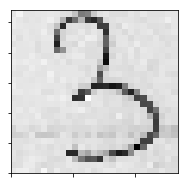

In [12]:
draw_digit(data_img)

In [13]:
# モデルを利用して予測をする関数を定義
def predict(model, X):
    # データ数が1の場合は、バッチサイズ分の次元を追加
    if len(X.shape) == 1:  
        pred = model.predictor(X[None, ...]).data.argmax()
    # データ数が2以上の場合はそのまま
    else:  
        pred = model.predictor(X).data.argmax(axis=1)
    return pred

In [15]:
pred = predict(model, data_img)
ans = 3
print(pred)
if(pred == ans):
    print('Success')
else:
    print('Error')

3
Success


C:\Users\Ritor\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


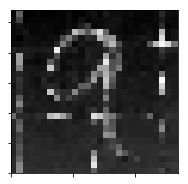

In [21]:
img_9 = Image.open("./picture/num_9.jpg")
data_img_9 = convert_img(img_9)
draw_digit(data_img_9)

In [22]:
pred = predict(model, data_img)
ans = 9
print(pred)
if(pred == ans):
    print('Success')
else:
    print('Error')

3
Error


C:\Users\Ritor\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


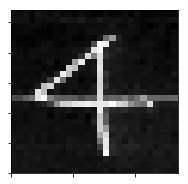

In [23]:
img_4 = Image.open("./picture/num_4.jpg")
data_img_4 = convert_img(img_4)
draw_digit(data_img_4)

In [24]:
pred = predict(model, data_img)
ans = 4
print(pred)
if(pred == ans):
    print('Success')
else:
    print('Error')

3
Error


In [ ]:
# 精度のはずなんだけど…